In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

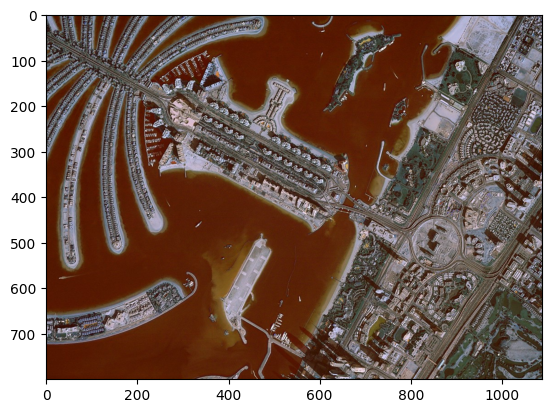

In [2]:
image = cv2.imread("C:\\Users\\geetha\\Downloads\\image.jpg")
plt.imshow(image)
plt.show()

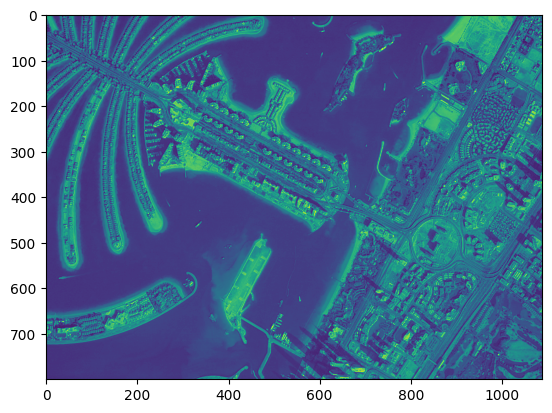

In [3]:
img_RGB = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray)
plt.show()

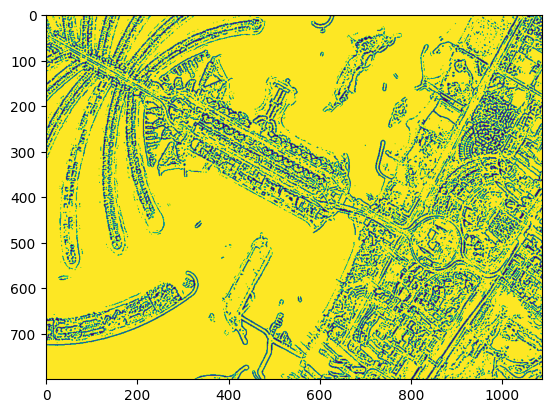

In [4]:
img1m = cv2.medianBlur(img_gray,3)
ath2 = cv2.adaptiveThreshold(img1m,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,11)
plt.imshow(ath2)
plt.show()

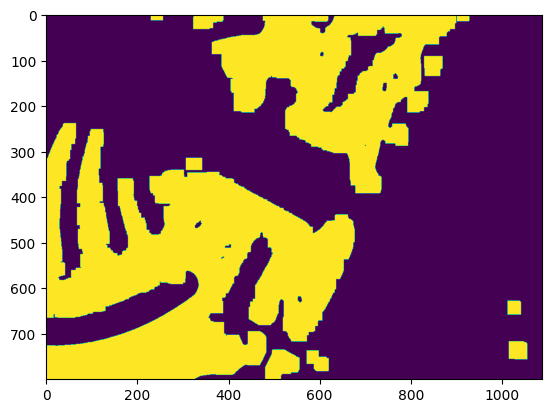

In [5]:
kernal = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(ath2,cv2.MORPH_OPEN,kernal, iterations = 13)
plt.imshow(opening)
plt.show()

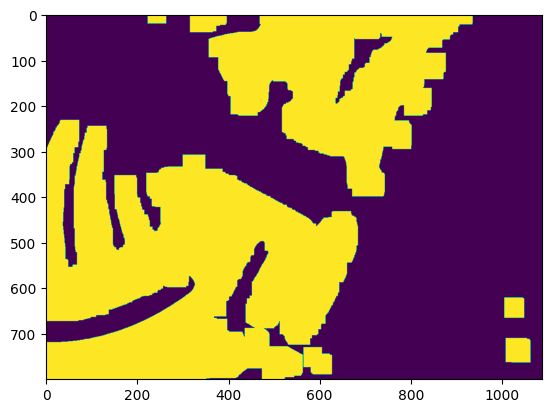

In [6]:
sure_bg = cv2.dilate(opening,kernal,iterations = 7)
plt.imshow(sure_bg)
plt.show()

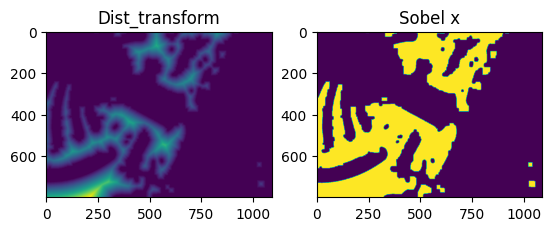

In [7]:
dist_transform =  cv2.distanceTransform(opening,cv2.DIST_L2,3)
plt.subplot(1,2,1),plt.imshow(dist_transform)
plt.title('Dist_transform'),
ret, sure_fg = cv2.threshold(dist_transform,0.05*dist_transform.max(),255,0)
plt.subplot(1,2,2),plt.imshow(sure_fg)
plt.title('Sobel x')
plt.show()

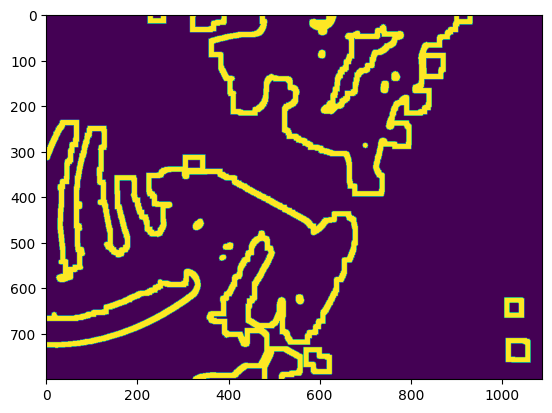

In [10]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown)
plt.show()

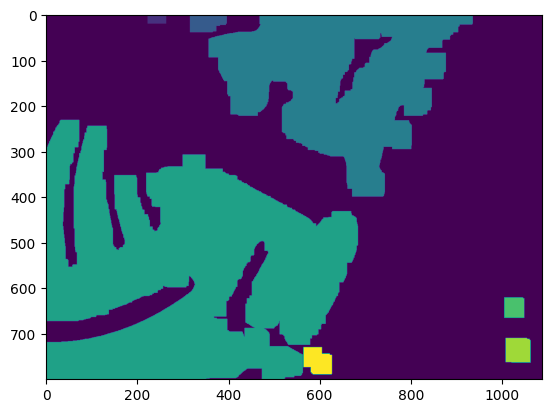

In [11]:
ret, markers = cv2.connectedComponents(sure_bg)
markers = markers+1
plt.imshow(markers)
plt.show()

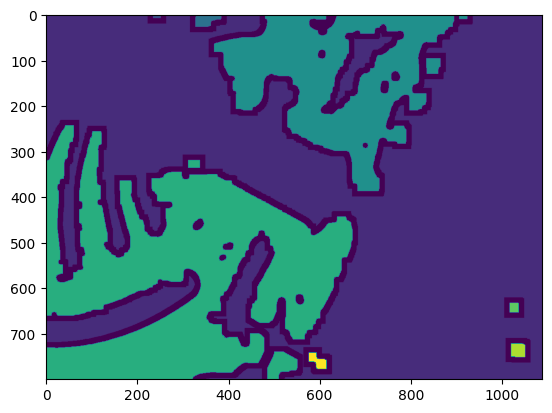

In [12]:
markers[unknown==255] = 0
plt.imshow(markers)
plt.show()

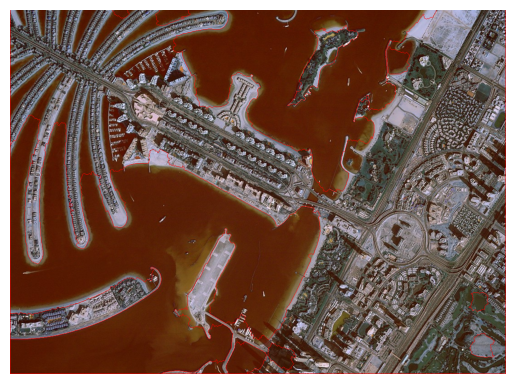

In [13]:
markers = cv2.watershed(image,markers)
image[markers == -1] = (255,0,0)
plt.imshow(image)
plt.axis('off')
plt.show()